# 8: 2ビットの量子テレポーテーション

In [1]:
from renom_q import *

量子テレポーテーションとは、古典的情報(00, 01, 10, 11)として2ビットを伝送して、1量子ビットの量子状態が転送できるという量子通信プロトコルである。

送信者をアリス、受信者をボブとする。アリスが送りたい情報を$\left| x \right\rangle=(\left| 0 \right\rangle + \left| 1 \right\rangle)/\sqrt{2}$とすると、

$$\frac{\left| 0 \right\rangle + \left| 1 \right\rangle}{\sqrt{2}}\left| 00 \right\rangle \xrightarrow{I \otimes H \otimes I} \frac{\left| 0 \right\rangle + \left| 1 \right\rangle}{\sqrt{2}}\frac{\left| 0 \right\rangle + \left| 1 \right\rangle}{\sqrt{2}}\left| 0 \right\rangle \xrightarrow{cx_{12}} \frac{\left| 0 \right\rangle + \left| 1 \right\rangle}{\sqrt{2}}\frac{\left| 00 \right\rangle + \left| 11 \right\rangle}{\sqrt{2}} \\
\xrightarrow{cx_{01}} \frac{1}{2} \left[ \left| 000 \right\rangle + \left| 001 \right\rangle + \left| 110 \right\rangle + \left| 101 \right\rangle \right] \xrightarrow{H \otimes I \otimes I} \frac{1}{2} \left[ \frac{\left| 0 \right\rangle + \left| 1 \right\rangle}{\sqrt{2}} \left( \left| 00 \right\rangle + \left| 11 \right\rangle \right) + \frac{\left| 0 \right\rangle - \left| 1 \right\rangle}{\sqrt{2}} \left( \left| 01 \right\rangle + \left| 10 \right\rangle \right) \right] \\
\xrightarrow{cx_{12}} \frac{1}{2} \left[ \frac{\left| 0 \right\rangle + \left| 1 \right\rangle}{\sqrt{2}} \left( \left| 00 \right\rangle + \left| 10 \right\rangle \right) + \frac{\left| 0 \right\rangle - \left| 1 \right\rangle}{\sqrt{2}} \left( \left| 01 \right\rangle + \left| 11 \right\rangle \right) \right] \xrightarrow{cz_{02}} \frac{1}{2} \left[ \left| 00 \right\rangle + \left| 01 \right\rangle + \left| 10 \right\rangle + \left| 11 \right\rangle \right] \frac{\left| 0 \right\rangle + \left| 1 \right\rangle}{\sqrt{2}} $$

In [2]:
def qt(qci, a, ae, b):
    qci.h(ae)
    qci.cx(ae, b)
    qci.cx(a, ae)
    qci.h(a)
    qci.cx(ae, b)
    qci.cz(a, b)

## 8-1: 送る情報 $\left| x \right\rangle=(\left| 0 \right\rangle + \left| 1 \right\rangle)/\sqrt{2}$ (Hゲート)の場合

{'0': 515, '1': 509}


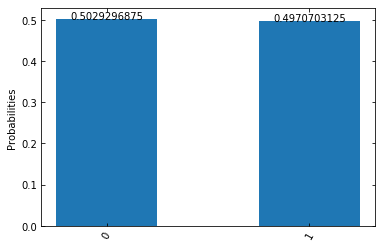

In [3]:
ba = 2       #Alice
bb = 1       #Bob
cn = 1       #Bob
qa = QuantumRegister(ba, "alice")
qb = QuantumRegister(bb, "bob")
c = ClassicalRegister(cn, "bob1")
qc = QuantumCircuit(qa, qb, c)

qc.h(qa[0])

qt(qc, qa[0], qa[1], qb[0])
qc.measure(qb[0], c[0])

r = execute(qc)
print(r)
plot_histogram(r)

## 8-2: 送る情報 $\left| x \right\rangle=\left| 0 \right\rangle$ (ゲートなし)の場合

{'0': 1024}


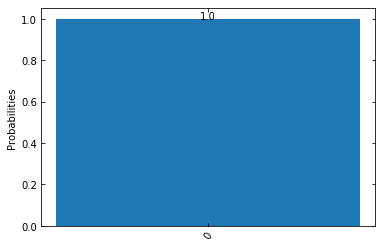

In [4]:
ba = 2       #Alice
bb = 1       #Bob
cn = 1       #Bob
qa = QuantumRegister(ba, "alice")
qb = QuantumRegister(bb, "bob")
c = ClassicalRegister(cn, "bob1")
qc = QuantumCircuit(qa, qb, c)

qt(qc, qa[0], qa[1], qb[0])
qc.measure(qb[0], c[0])

r = execute(qc)
print(r)
plot_histogram(r)

## 8-3: 送る情報 $\left| x \right\rangle=\left| 1 \right\rangle$ (Xゲート)の場合

{'1': 1024}


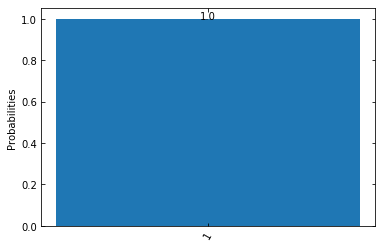

In [5]:
ba = 2       #Alice
bb = 1       #Bob
cn = 1       #Bob
qa = QuantumRegister(ba, "alice")
qb = QuantumRegister(bb, "bob")
c = ClassicalRegister(cn, "bob1")
qc = QuantumCircuit(qa, qb, c)

qc.x(qa[0])

qt(qc, qa[0], qa[1], qb[0])
qc.measure(qb[0], c[0])

r = execute(qc)
print(r)
plot_histogram(r)

## 8-4: 送る情報 $\left| x \right\rangle=- \left| 1 \right\rangle$ (Xゲート, Zゲート)の場合

{'1': 1024}


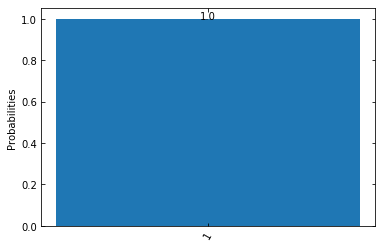

In [6]:
ba = 2       #Alice
bb = 1       #Bob
cn = 1       #Bob
qa = QuantumRegister(ba, "alice")
qb = QuantumRegister(bb, "bob")
c = ClassicalRegister(cn, "bob1")
qc = QuantumCircuit(qa, qb, c)

qc.x(qa[0])
qc.z(qa[0])

qt(qc, qa[0], qa[1], qb[0])
qc.measure(qb[0], c[0])

r = execute(qc)
print(r)
plot_histogram(r)

## 8-5: 送る情報 $\left| x \right\rangle=i \left| 1 \right\rangle$ (Yゲート)の場合

{'1': 1024}


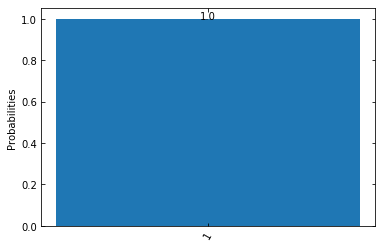

In [7]:
ba = 2       #Alice
bb = 1       #Bob
cn = 1       #Bob
qa = QuantumRegister(ba, "alice")
qb = QuantumRegister(bb, "bob")
c = ClassicalRegister(cn, "bob1")
qc = QuantumCircuit(qa, qb, c)

qc.y(qa[0])

qt(qc, qa[0], qa[1], qb[0])
qc.measure(qb[0], c[0])

r = execute(qc)
print(r)
plot_histogram(r)